In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv('dataset.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


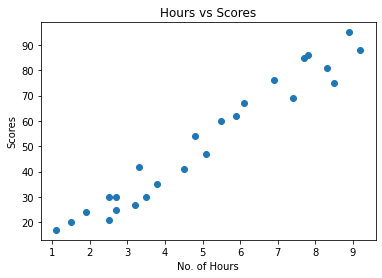

In [7]:
plt.scatter(data['Hours'],data['Scores'])
plt.xlabel('No. of Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores')
plt.show()

<AxesSubplot:>

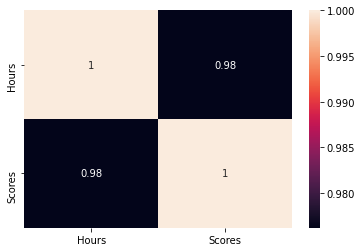

In [30]:
tc=data.corr()
sns.heatmap(tc,annot=True)

There is an increasing trend ie no. of hours is linearly related to the scores of the student.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data['Hours'].values.reshape(-1,1), data['Scores'], test_size = 0.2)

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20, 1), (20,), (5, 1), (5,))

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [13]:
coef=model.coef_
coef

array([9.65726033])

In [14]:
inter=model.intercept_
inter

2.429727131615202

In [15]:
#since y=mx+c
line=(data['Hours'].values*coef)+inter

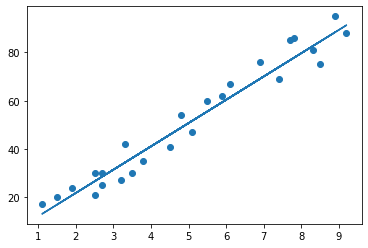

In [16]:
#plotting the estimated line
plt.scatter(data.Hours,data.Scores)
plt.plot(data.Hours,line)
plt.show()

In [17]:
#Making predictions
y_pred=model.predict(X_test)
y_pred

array([48.78457671, 28.50433002, 55.54465895, 82.58498787, 88.37934407])

In [18]:
pred_compare=pd.DataFrame({'Actual':y_test,'Prediction':y_pred})
pred_compare

,Actual,Prediction
21,54,48.784577
20,30,28.504330
7,60,55.544659
8,81,82.584988
15,95,88.379344


Evaluating the model

In [19]:
from sklearn import metrics

In [20]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.8744156238686003


In [22]:
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error:  19.12660083245637


In [23]:
print("Root Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred)**0.5)

Root Mean Squared Error:  4.373396944305006


In [24]:
print("R2 Score: ", metrics.r2_score(y_test,y_pred))

R2 Score:  0.9620804900228859


In [25]:
ab=np.array(9.25).reshape(1,-1)
score=model.predict(ab)
score

array([91.75938518])

In [26]:
print('{} is the predicted score if a student studies for 9.25 hrs in a day.'.format(score.round(2)[0]))

91.76 is the predicted score if a student studies for 9.25 hrs in a day.
